<a href="https://colab.research.google.com/github/Phonghuynh66/Artificial-Intelligence-Class/blob/master/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

train_X = train_X.astype('float32') /255
test_X = test_X.astype('float32') /255

from keras.utils import to_categorical

train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.layers import Activation
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 20
classes = 10
loss = losses


model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (32, 32, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(classes,activation='softmax'))
model.add(Dropout(0.5))

from keras.optimizers import SGD
sgd = SGD(learning_rate = 0.1, decay = 1e-6, momentum= 0.9, nesterov = True )
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
model.summary()

train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

170498071/170498071 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        

Test loss:  2.3039183616638184
Test accuracy:  0.10000000149011612


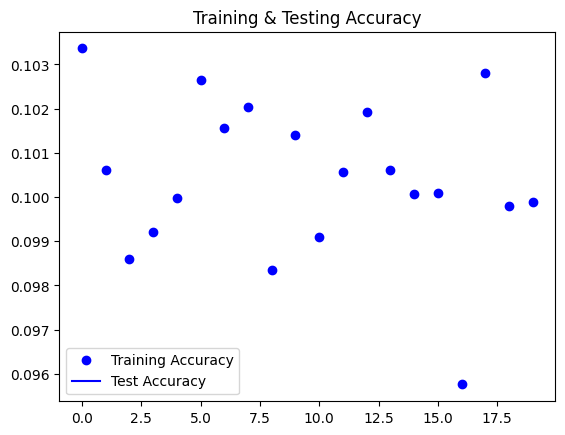

In [2]:
eval = model.evaluate(test_X, test_Y, verbose = 0)  
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')  
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend()
plt.show()